In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [3]:
from sklearn.model_selection import GridSearchCV

# Base

In [4]:
# Importando a base
train = pd.read_csv('train_treated.csv', index_col=0)

## Dividindo entre treino e teste

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop(columns=['Survived']), train['Survived'], test_size=0.25, random_state=0)

# Criando dicionario de scores

In [6]:
metrics_dict = {}

In [7]:
def update_score_dict(name, predict):
    metrics_dict[name] = {
        'label': name, 
        'accuracy': metrics.accuracy_score(predict, y_test), 
        'recall': metrics.recall_score(predict, y_test), 
        'precision': metrics.precision_score(predict, y_test), 
        'F1': metrics.f1_score(predict, y_test)
    }

# Plot Matriz de Confusão

In [8]:
def plot_CM(classifier):
    fig, ax = plt.subplots(figsize=(3, 3))
    plot_confusion_matrix(classifier, x_test, y_test, cmap=plt.cm.Blues, values_format = '', ax=ax)
    plt.show()

# LogisticRegression

In [9]:
# Importando
from sklearn.linear_model import LogisticRegression
# Instanciando
logisticR = LogisticRegression(max_iter=350)

In [10]:
logisticR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 350,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Default

In [11]:
# Treinando e prevendo
logisticR.fit(x_train, y_train)
logisticR_predict = logisticR.predict(x_test)

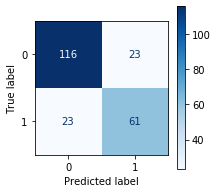

In [12]:
plot_CM(logisticR)

In [13]:
update_score_dict('Logistic', logisticR_predict)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1
0,Logistic,0.793722,0.72619,0.72619,0.72619


## Grid Search

In [39]:
logisticR_param_grid = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}

logisticR_gridsearch = GridSearchCV(logisticR, param_grid = logisticR_param_grid, scoring="accuracy", n_jobs=4, verbose = 1)

logisticR_gridsearch.fit(x_train, y_train)

logisticR_best = logisticR_gridsearch.best_estimator_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.1s finished


In [43]:
logisticR_best

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=350, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
logisticR_predict_gs = logisticR_best.predict(x_test)

In [45]:
update_score_dict('Logistic gridsearch', logisticR_predict_gs)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1
0,Logistic,0.793722,0.726190,0.726190,0.726190
1,SVM default,0.721973,0.823529,0.333333,0.474576
2,SVM gridsearch,0.775785,0.702381,0.702381,0.702381
3,Decision,0.753363,0.670588,0.678571,0.674556
4,Neural,0.798206,0.729412,0.738095,0.733728
5,Logistic gridsearch,0.789238,0.728395,0.702381,0.715152


# Máquina de Vetor Suporte

In [14]:
# Importando
from sklearn.svm import SVC
# Instanciando
supportV = SVC()

In [15]:
supportV.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Default

In [16]:
# Treinando e prevendo com default
supportV.fit(x_train, y_train)
supportV_predict = supportV.predict(x_test)

In [17]:
update_score_dict('SVM default', supportV_predict)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1
0,Logistic,0.793722,0.726190,0.726190,0.726190
1,SVM default,0.721973,0.823529,0.333333,0.474576


## Grid Search

In [18]:
supportV_param_grid = {
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto'],
    'C': [1, 10, 50, 100,200,300, 1000]
}

supportV_gridsearch = GridSearchCV(supportV, param_grid = supportV_param_grid, scoring="accuracy", n_jobs=4, verbose = 1)

supportV_gridsearch.fit(x_train, y_train)

supportV_best = supportV_gridsearch.best_estimator_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  62 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    1.3s finished


In [29]:
supportV_best

SVC(C=300, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
supportV_predict_gs = supportV_best.predict(x_test)

In [20]:
update_score_dict('SVM gridsearch', supportV_predict_gs)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1
0,Logistic,0.793722,0.726190,0.726190,0.726190
1,SVM default,0.721973,0.823529,0.333333,0.474576
2,SVM gridsearch,0.775785,0.702381,0.702381,0.702381


# Decision tree

In [21]:
# Importando
from sklearn.tree import DecisionTreeClassifier
# Instanciando
decisionT = DecisionTreeClassifier(random_state=42)

In [22]:
decisionT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

## Default

In [23]:
# Treinando e prevendo
decisionT.fit(x_train, y_train)
decisionT_predict = decisionT.predict(x_test)

In [24]:
update_score_dict('Decision', decisionT_predict)
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1
0,Logistic,0.793722,0.726190,0.726190,0.726190
1,SVM default,0.721973,0.823529,0.333333,0.474576
2,SVM gridsearch,0.775785,0.702381,0.702381,0.702381
3,Decision,0.753363,0.670588,0.678571,0.674556


# Redes Neurais

In [34]:
# Importando
from sklearn.neural_network import MLPClassifier
# Instanciando
neuralN = MLPClassifier(random_state=42, max_iter=700)

In [35]:
# Treinando e prevendo
neuralN.fit(x_train, y_train)
neuralN_predict = neuralN.predict(x_test)

In [36]:
update_score_dict('Neural', neuralN_predict)

# Scores

In [37]:
pd.DataFrame(metrics_dict.values())

,label,accuracy,recall,precision,F1
0,Logistic,0.793722,0.726190,0.726190,0.726190
1,SVM default,0.721973,0.823529,0.333333,0.474576
2,SVM gridsearch,0.775785,0.702381,0.702381,0.702381
3,Decision,0.753363,0.670588,0.678571,0.674556
4,Neural,0.798206,0.729412,0.738095,0.733728
